# Assignment #0 - Data and Visualization

<font color="red"> <b> Due: Sep 25 (Friday) 11:00 pm </b> </font>


<font color="blue"> Yike Li </font>

# I. Overview

In this assignment, you are getting familiar to the tools including Python, numpy, matplotlib, pandas, and Jupyter notebook. Search for data, one for classification and one for regression from any data source. 
The data should to be large enough more than 10,000 samples and more than 10 feature values. 

# II. Data

Introduce your data and visualize them. Describe your observations about the data.

The two data sets I am going to use in this assignment: 
- For the regression dataset, it is from the load forecasting track of GEFCom2012 (Global Energy Forecasting Competition), which is a public data set and can be retrieved online. 
- For the classification dataset, the data is publicly available at UCI and some details will be shared in the later section. 

In [1]:
# import
import numpy as np
import pandas as pd
import sys, os
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

## A. Regression Dataset

This dataset comes from the load forecasting track of GEFCom2012 (Global Energy Forecasting Competition). During the competition, contestants were asked to forecast and backcast the electricity demand for 21 load zones, of which the Zone 21 was the sum of the other 20 zones. The entire data set consists of hourly load data of 20 zones from the 1st hour of 1/1/2004 to the 6th hour of 6/30/2008, with hourly temperature history from 11 anonymous weather stations ($T_1$-$T_{11}$). Since the dataset is huge, in this assignment, I only conduct the EDA using the Zone 11 data. 

Further details about GEFCom2012 can be found in this [link](http://blog.drhongtao.com/2016/07/gefcom2012-load-forecasting-data.html). 

In [2]:
# Load the regression dataset, GEFCOM2012 load forecasting track, loads are in kW
user = 'Administrator'
zone_21 = pd.read_excel(f'C:/Users/{user}/Dropbox/Misc/ITCS 8156/GEFCom2012_zone 21.xlsx')

Here is how the dataset looks like, as well as the some of the basic statistics. This dataset is pre-cleaned and thus is ready for data visualization. 

In [3]:
zone_21.head(5)

,zone_id,year,month,day,hour,load,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,weekday,date,T_ave
0,21,2004,1,1,1,1.397668,46,38,44,45,42,44,45,43,41,42,36,5,2004-01-01 00:00:00,42.363636
1,21,2004,1,1,2,1.351507,46,36,42,43,42,43,44,44,39,43,32,5,2004-01-01 01:00:00,41.272727
2,21,2004,1,1,3,1.315742,45,35,40,41,40,42,41,42,36,43,31,5,2004-01-01 02:00:00,39.636364
3,21,2004,1,1,4,1.308023,41,30,36,37,39,38,40,34,35,39,30,5,2004-01-01 03:00:00,36.272727
4,21,2004,1,1,5,1.344117,39,30,34,33,40,38,35,30,33,35,34,5,2004-01-01 04:00:00,34.636364


In [4]:
zone_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   zone_id  26304 non-null  int64         
 1   year     26304 non-null  int64         
 2   month    26304 non-null  int64         
 3   day      26304 non-null  int64         
 4   hour     26304 non-null  int64         
 5   load     26304 non-null  float64       
 6   T1       26304 non-null  int64         
 7   T2       26304 non-null  int64         
 8   T3       26304 non-null  int64         
 9   T4       26304 non-null  int64         
 10  T5       26304 non-null  int64         
 11  T6       26304 non-null  int64         
 12  T7       26304 non-null  int64         
 13  T8       26304 non-null  int64         
 14  T9       26304 non-null  int64         
 15  T10      26304 non-null  int64         
 16  T11      26304 non-null  int64         
 17  weekday  26304 non-null  int64 

Below shows the statistics (mean, standard deviation, minimum and maximum) of temperature recorded at each station. It can be seen the temperature values vary a wide range, particularly for the minimum temperature. The temperature is in the unit of Fahrenheit. 

In [5]:
# Observe the temperature reported at each station
temperature_2012 = zone_21.iloc[:, 6:-3]
desc = temperature_2012.describe().loc[['mean', 'std', 'min', 'max']]
print(desc.T)

          mean        std   min    max
T1   59.671799  16.870646  12.0  103.0
T2   54.825274  17.241595   2.0   95.0
T3   56.122795  17.463694   8.0   97.0
T4   60.108082  17.369716  11.0  103.0
T5   56.915070  17.484062   6.0   99.0
T6   58.469016  16.963792   7.0   98.0
T7   58.716811  18.001334   8.0  101.0
T8   59.168530  17.651083   6.0  103.0
T9   56.654159  17.812373   5.0   99.0
T10  58.648114  17.281610   5.0  100.0
T11  55.018552  17.716102   0.0   97.0


Three years (2004-2006) of the hourly load plot at the aggregated load zone - $Z_{21}$ and hourly temperature plot obtained from the average of 11 temperature series, are plotted. We see very strong yearly seasonality for both the Load (up) and the Temperature (down). 

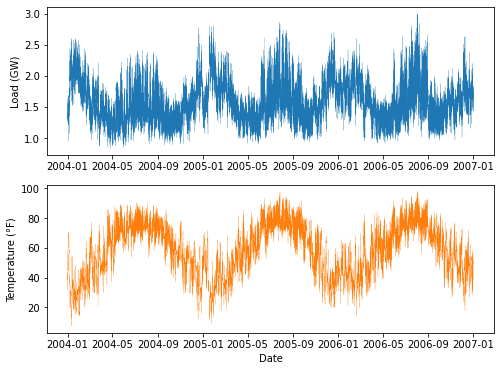

In [6]:
# 2012 Hourly Load and Temperature curve
plt.figure(figsize=(8, 6))
plt.subplot(211)  # Hourly load plot
plt.plot(zone_21.date, zone_21.load, lw=.2)
plt.ylabel('Load (GW)')
plt.subplot(212)  # Hourly temperature plot
plt.plot(zone_21.date, zone_21.T_ave, lw=.2, c='tab:orange')
plt.ylabel('Temperature (°F)')
plt.xlabel('Date')
plt.show()

Temperature is known to have a strong correlation with electricity usage patterns. Below shows the scatterplot of load – temperature relationship using three years of data (2004-2006) from the $Z_{21}$ and the average temperature from the 11 stations. The graph shows a strong correlation (the typical “hockey stick” shape) between the load and temperature. On the left arm, the load goes up for heating needs during the winter when the temperature drops below a certain point. On the right arm, the load goes up for cooling needs during the summer when the temperature increases. This scatterplot shows that there is a cutoff point at around 60 °F.

Also a third order polynomial line is fitted. 

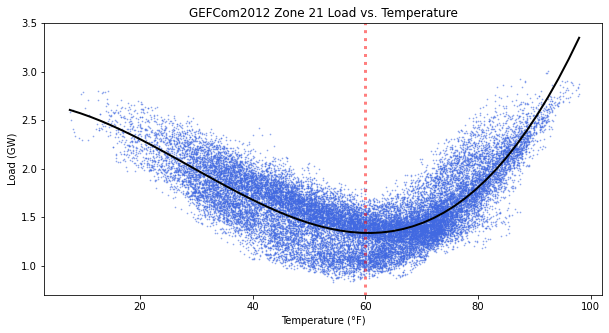

In [7]:
# 2012 Load vs. Temperature w/ fitted curve
from numpy.polynomial.polynomial import polyfit, polyval

plt.figure(figsize=(10, 5))
plt.scatter(zone_21.T_ave, zone_21.load, s=0.5, alpha=0.5, marker="o", c='royalblue')
plt.axvline(x=60, color='red', linestyle=':', alpha=0.5, linewidth=3)  # vertical dotted line
plt.title('GEFCom2012 Zone 21 Load vs. Temperature')
coefs = polyfit(zone_21.T_ave, zone_21.load, 3)  # fit 3rd order polynomial
x_new = np.linspace(min(zone_21.T_ave), np.max(zone_21.T_ave))
ffit = polyval(x_new, coefs)
plt.plot(x_new, ffit, '-', c='black', linewidth=2)
plt.xlim(3, 102)
plt.ylim(.7, 3.5)
plt.xlabel('Temperature (°F)')
plt.ylabel('Load (GW)')
plt.show()

To model the annual seasonality, the categorical variables – month, have been included to categorize load patterns throughout the year. The figure below gives the scatterplots of load – temperature relationship at each month of a year from the aggregated zone and the average temperature from the 11 stations in this case study. The correlation between the load and temperature during the winter months (Month=12, 1, 2, 3) and summer months (Month=6, 7, 8, 9) is stronger than the remaining months, largely due to during these 6 months, load tends to increase when the weather (temperature here) gets extreme. In the remaining 4 months (Month=4, 5, 10, 11), the relationship between the two is weak.

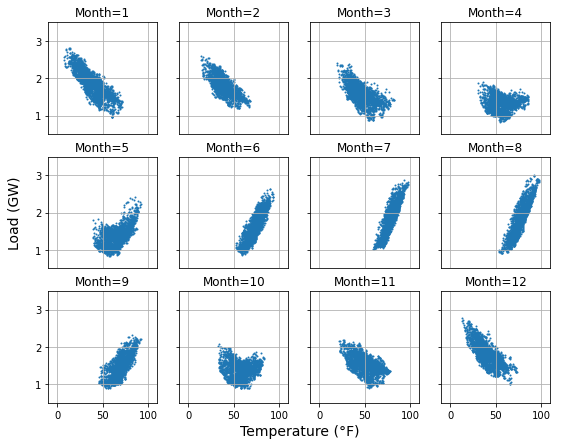

In [8]:
fig, ax = plt.subplots(nrows=3, ncols=4, sharex='col', sharey='row', figsize=(9, 7))
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
# plt.rcParams['ytick.labelsize'] = 10
plt.xlabel('Temperature (°F)', fontsize=14)
plt.ylabel('Load (GW)', fontsize=14)
# fig.suptitle('Load vs. Temperature by Month')
for i in range(4):  # col
    for j in range(3):  # row
        ax[j, i].scatter(zone_21.loc[zone_21['month'] == i + j * 4 + 1].T_ave,
                         zone_21.loc[zone_21['month'] == i + j * 4 + 1].load, s=1)
        ax[j, i].set_title('Month=' + str(i + j * 4 + 1), fontsize=12)
        ax[j, i].set(xlim=(-10, 110), ylim=(0.5, 3.5))  # set xlim and ylim for each subplot
        ax[j, i].grid(True)  # add gridlines
        if j != 2:
            ax[j, i].xaxis.set_ticks_position('none')  # remove xsticks
plt.show()

To model the daily seasonality of hourly load, the coincident hour has been used to categorize the load patterns throughout the day. The plot below presents the scatterplots of load – temperature relationship at each hour from the $Z_{21}$ and the average temperature from the 11 weather stations. We also see the shape of load consumption behavior (versus Temperature) is different at hours of the day. 

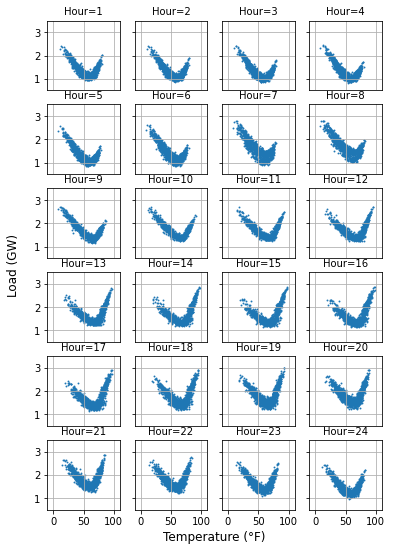

In [9]:
# 2012 Load vs. Temperature by Hour
fig, ax = plt.subplots(nrows=6, ncols=4, sharex='col', sharey='row', figsize=(6, 9))
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('Temperature (°F)', fontsize=12)
plt.ylabel('Load (GW)', fontsize=12)
# fig.suptitle('Load vs. Temperature by Month')
for i in range(4):  # col
    for j in range(6):  # row
        ax[j, i].scatter(zone_21.loc[zone_21['hour'] == i + j * 4 + 1].T_ave,
                         zone_21.loc[zone_21['hour'] == i + j * 4 + 1].load, s=.8)
        ax[j, i].set_title('Hour=' + str(i + j * 4 + 1), fontsize=10)
        ax[j, i].title.set_position([.5, .95])  # adjust distance between title and plot
        ax[j, i].set(xlim=(-10, 110), ylim=(0.5, 3.5))  # set xlim and ylim for each subplot
        ax[j, i].xaxis.set_ticks(np.arange(0, 110, 50))
        ax[j, i].grid(True)  # add gridlines
        if j != 5:
            ax[j, i].xaxis.set_ticks_position('none')
# plt.savefig('filename.png', bbox_inches='tight') # save plot, 'tight' fits for subplots
plt.show()

## B. Classification Dataset

In this assignment I chose an open access dataset. The context of this dataset is that a Taiwan-based credit card issuer wants to better predict the likelihood/probability of default for its customers at the following month, as well as identify the key drivers that determine this likelihood. This can inform the issuer’s decisions on who to give a credit card to and what credit limit to provide. It would also help the issuer have a better understanding of their current and potential customers, which would inform their future strategy, including their planning of offering targeted credit products to their customers.

This dataset contains information on 30000 customers and each with 24 features, including demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005, as well as the outcome of whether the customer default or not. The dataset can be downloaded from this [link](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). 

Below gives the descriptions of the 24 features and the last row - "default.payment.next.month", is the binary target variable, indicating whether the client defaulted for the following month (Oct 2005). 

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_1: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

- **default.payment.next.month: Did the customer default (1=yes, 0=no)**

The following cell imports all used packages and the dataset. 

In [10]:
# import
import numpy as np
import pandas as pd
import sys, os
from scipy.special import expit  # logistic sigmoid function
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
%matplotlib inline

register_matplotlib_converters()

# Load the UCI_Credit_Card dataset
user = 'Administrator'
df = pd.read_csv(f'C:/Users/{user}/Dropbox/Misc/ITCS 8156/UCI_Credit_Card.csv')
df.rename(columns={'PAY_0': 'PAY_1', 'default.payment.next.month': 'default'}, inplace=True)

Take a look at the first five rows.

In [11]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Observing the statistics of each variable, we can see that the average age of the customers is 35.5. The mean available credit is 167k while the std is quite large. The maximum credit limit is 1M. From our target variable, "default.payment.next.month", the mean of 0.221 suggests that there are about 22.1% customers will default in the next month. 

In [12]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


The following plot shows a histogram for each variable in the dataset.

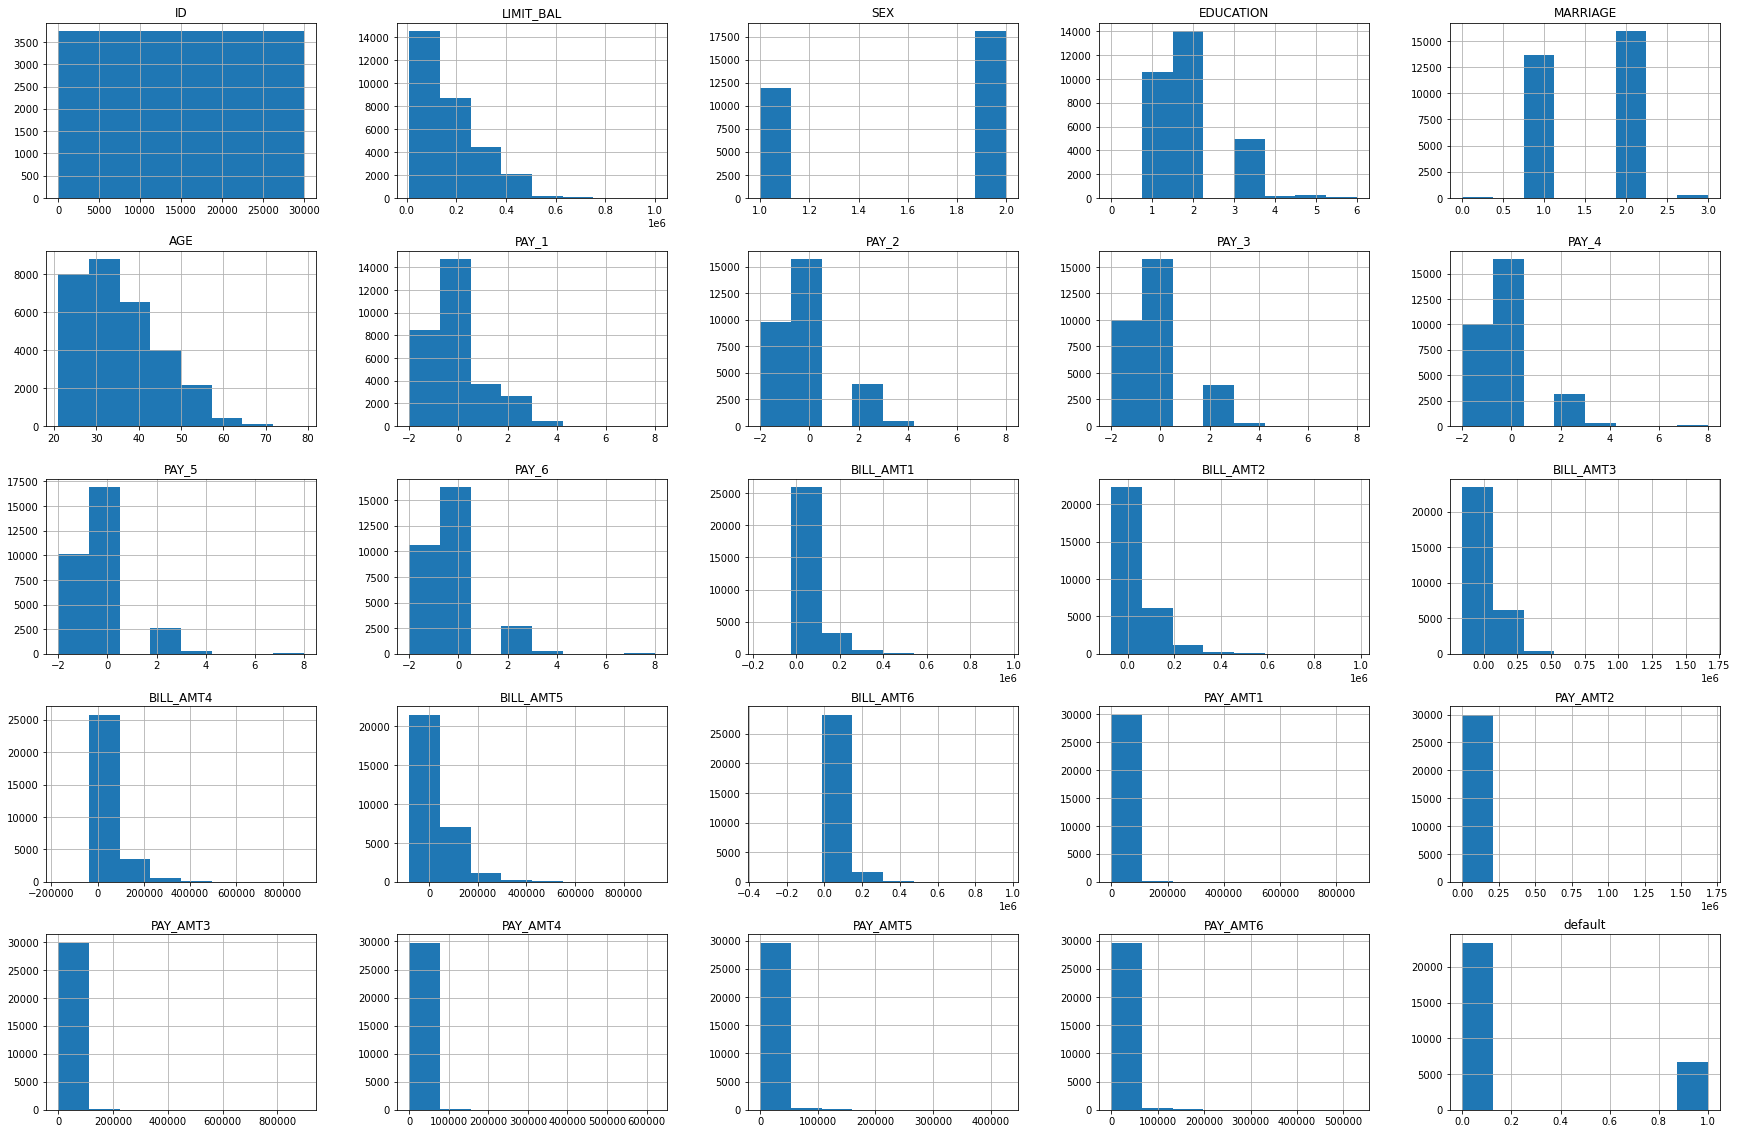

In [13]:
df.hist(figsize=(30,20), bins=8)
plt.show()

Next, we want to get an idea of the features that can be considered to separate the target variable, such that in the later stage, we can use the features that have most discriminatory power in our classification model. 

First, I use the following plots to show the repayment status (PAY_1 - PAY_6, each has 12 states of status), amount of previous payment (PAY_AMT1 - PAY_AMT6), and amount of billing statement (BILL_AMT1 - BILL_AMT6) at each month for non-defaulted (class=0, left plots) and defaulted (class=1, right plots) customers. 

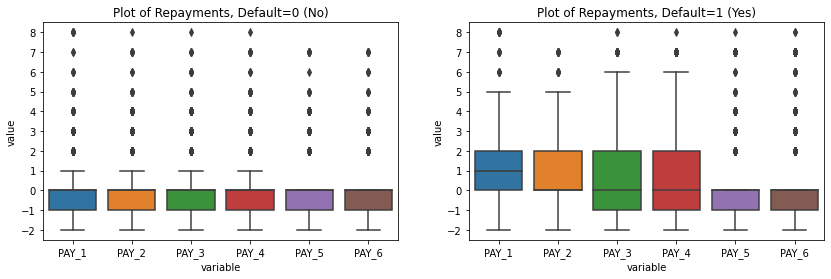

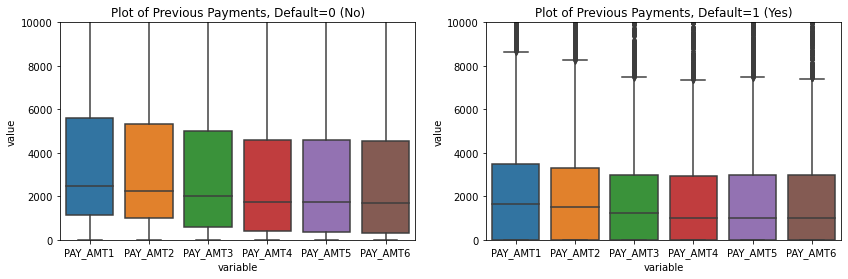

Non-defaulted customers:
             PAY_AMT1      PAY_AMT2       PAY_AMT3       PAY_AMT4  \
count   23364.000000  2.336400e+04   23364.000000   23364.000000   
mean     6307.337357  6.640465e+03    5753.496833    5300.529319   
std     18014.508990  2.530226e+04   18684.255937   16689.778060   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%      1163.750000  1.005000e+03     600.000000     390.000000   
50%      2459.500000  2.247500e+03    2000.000000    1734.000000   
75%      5606.250000  5.311250e+03    5000.000000    4602.000000   
max    873552.000000  1.684259e+06  896040.000000  621000.000000   

            PAY_AMT5       PAY_AMT6  
count   23364.000000   23364.000000  
mean     5248.220296    5719.371769  
std     16071.667860   18792.950473  
min         0.000000       0.000000  
25%       369.000000     300.000000  
50%      1765.000000    1706.000000  
75%      4600.000000    4545.000000  
max    426529.000000  528666.000000   

Defaulted custome

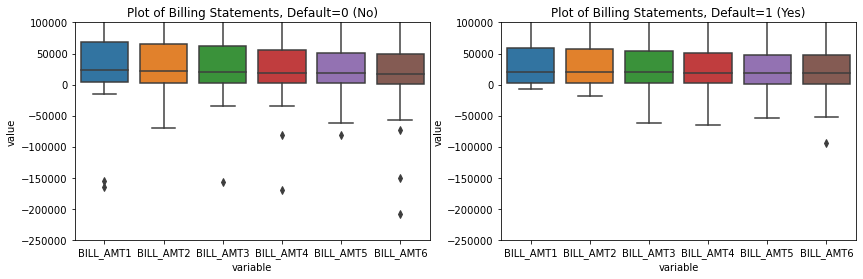

In [14]:
def filter_df(data, col_from='PAY_1', col_to='PAY_6'):
    """Select subset columns from dataframe"""
    data_plot = data.iloc[:, data.columns.get_loc(col_from):data.columns.get_loc(col_to) + 1]
    return data_plot


def multivariate_boxplot(title, col_from, col_to, set_yticks=False, yticks=np.arange(-2, 8 + 1, 1),
                         set_ylim=False, ylim=(0, 1.25e6)):
    """Produce boxplots that include multiple columns in dataframe. """
    plt.figure(figsize=(14, 4))
    ax1 = plt.subplot(121)
    df_plot = filter_df(df_0, col_from=col_from, col_to=col_to)
    sns.boxplot(x='variable', y='value', data=pd.melt(df_plot))  # PAY_1 - PAY_6
    if set_yticks:
        plt.yticks(yticks)
    if set_ylim:
        plt.ylim(ylim[0], ylim[1])
    plt.title(f'Plot of {title}, Default=0 (No)')
    ax2 = plt.subplot(122, sharey=ax1)  # share the y axis of ax1
    df_plot = filter_df(df_1, col_from=col_from, col_to=col_to)
    sns.boxplot(x='variable', y='value', data=pd.melt(df_plot))  # PAY_1 - PAY_6
    plt.title(f'Plot of {title}, Default=1 (Yes)')
    plt.show()


def univariate_plot(title, col):
    """Produce barcharts for a single variable, grouped by default status. """
    group_df = df.groupby(['default', col])[col].count().unstack(0)
    group_df.iloc[:, 0] = 100 * group_df.iloc[:, 0] / group_df.iloc[:, 0].sum()  # convert to %
    group_df.iloc[:, 1] = 100 * group_df.iloc[:, 1] / group_df.iloc[:, 1].sum()  # convert to %
    ax = group_df.plot.bar(title=f'"Default" status by {title}', figsize=(12, 4))
    ax.set_ylabel('Percentage')
    plt.show()


df_0 = df[df['default'] == 0]
df_1 = df[df['default'] == 1]

# For repayments
multivariate_boxplot(title='Repayments', col_from='PAY_1', col_to='PAY_6', set_yticks=True)
# For previous payments
multivariate_boxplot(title='Previous Payments', col_from='PAY_AMT1', col_to='PAY_AMT6', set_ylim=True, ylim=(0, 1e4))
print('Non-defaulted customers:\n', df_0.loc[:, 'PAY_AMT1': 'PAY_AMT6'].describe(), '\n')
print('Defaulted customers:\n', df_1.loc[:, 'PAY_AMT1': 'PAY_AMT6'].describe())

# For billing statements
multivariate_boxplot(title='Billing Statements', col_from='BILL_AMT1', col_to='BILL_AMT6', set_ylim=True,
                     ylim=(-0.25e6, 1e5))

From the above plots, we observe that the Repayment status is very different between the defaulted customers and the non-defaulted ones. The defaulted customers were more likely to have payment delays during June-September, 2005 (PAY_1 - PAY_4). From the plots of Previous Payments and the statistics, we observe the non-defaulted customers tend to pay more than the defaulted ones. Regarding the billing statements, these two types of customers were close. 

Then we look at the remaining variables, such as credit limit, sex, education, marriage status and age information. From the statistics and plots below, we can tell that:
- The non-defaulted customers were granted with higher credit limits.
- Male is more likely to gain "default" status than female .
- If a person is married, then he/she is more likely to gain "default" status than being single.
- A person who went to a graduate school has lower chance of getting "default" than a person who only went to an university or high school.

**Up until now, we have identified the following variables to be used in the modeling stage**:
- (Categorical) **Repayment status: PAY_1 - PAY_4**
- (Numerical) **Previous payments: PAY_AMT1 - PAY_AMT6**
- (Numerical) **LIMIT_BAL**, (Categorical) **SEX, EDUCATION, MARRIAGE**

Non-defaulted customers:
             LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE
count    23364.000000  23364.000000  23364.000000  23364.000000  23364.000000
mean    178099.726074      1.614150      1.841337      1.558637     35.417266
std     131628.359660      0.486806      0.806780      0.520794      9.077355
min      10000.000000      1.000000      0.000000      0.000000     21.000000
25%      70000.000000      1.000000      1.000000      1.000000     28.000000
50%     150000.000000      2.000000      2.000000      2.000000     34.000000
75%     250000.000000      2.000000      2.000000      2.000000     41.000000
max    1000000.000000      2.000000      6.000000      3.000000     79.000000 

Defaulted customers:
            LIMIT_BAL          SEX    EDUCATION     MARRIAGE          AGE
count    6636.000000  6636.000000  6636.000000  6636.000000  6636.000000
mean   130109.656420     1.567058     1.894665     1.528029    35.725738
std    115378.540571     0.49

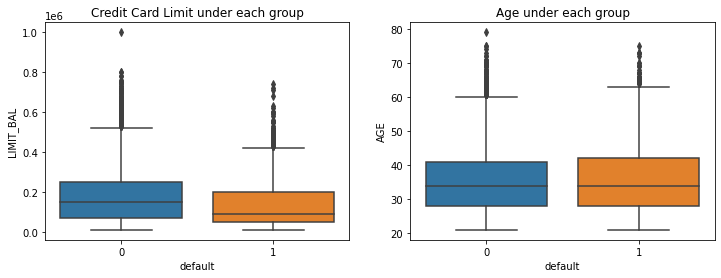

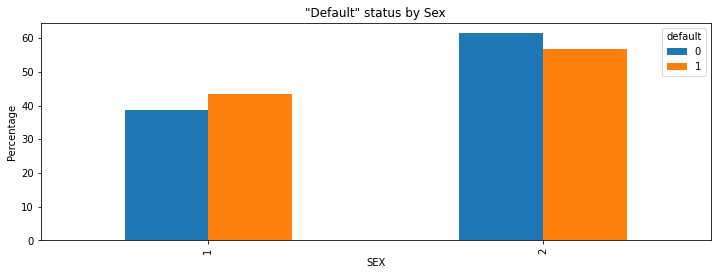

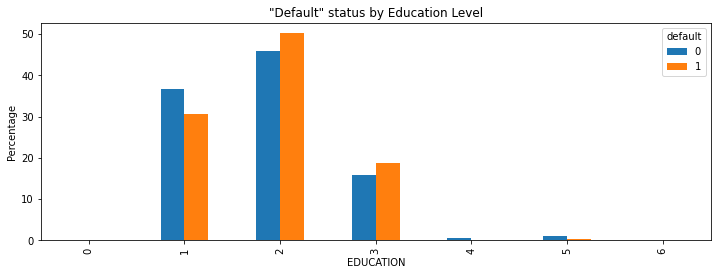

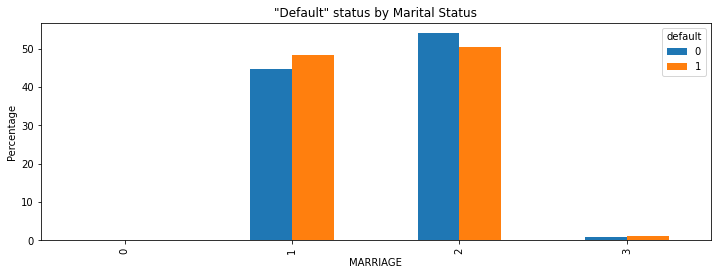

In [15]:
# For other variables in general
print('Non-defaulted customers:\n',
      df_0[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']].describe(), '\n')
print('Defaulted customers:\n', df_1[[
      'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']].describe(), '\n')


def univariate_plot(title, col):
    """Produce barcharts for a single variable, grouped by default status. """
    group_df = df.groupby(['default', col])[col].count().unstack(0)
    group_df.iloc[:, 0] = 100 * group_df.iloc[:, 0] / group_df.iloc[:, 0].sum()  # convert to %
    group_df.iloc[:, 1] = 100 * group_df.iloc[:, 1] / group_df.iloc[:, 1].sum()  # convert to %
    ax = group_df.plot.bar(title=f'"Default" status by {title}', figsize=(12, 4))
    ax.set_ylabel('Percentage')
    plt.show()


# Credit card limit and age boxplot
plt.figure(figsize=(12, 4))
plt.subplot(121)
sns.boxplot(x='default', y='LIMIT_BAL', data=df[['LIMIT_BAL', 'default']])
plt.title('Credit Card Limit under each group')
plt.subplot(122)
sns.boxplot(x='default', y='AGE', data=df[['AGE', 'default']])
plt.title('Age under each group')
plt.show()

# sex, education, marriage bar chart, with percentage
univariate_plot(title='Sex', col='SEX')
univariate_plot(title='Education Level', col='EDUCATION')
univariate_plot(title='Marital Status', col='MARRIAGE')

# IV. Conclusions
Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. 

The regression dataset for electric load forecasting can be used to study the relationship between temperature and the electricity usage. Since multiple weather stations data is available, there should be a process to select the weather stations and refine the temperature input for the load forecasting model. It is a regression problem since the forecast load is numerical.

The classification dataset contains multiple demographic information of the credit card holders. The objective is to predict the likelihood/probability of default for its customers at the following month. The challenge here is severe imbalance of the dataset (default vs. non-default). The classification result can be used to help the credit card issuer have a better understanding of their current and potential customers, which would inform their future strategy, including their planning of offering targeted credit products to their customers.

# References

List your references here... 
Follow either MLA or APA style!

(1). GEFCom2012 data. Retrieved from http://blog.drhongtao.com/2016/07/gefcom2012-load-forecasting-data.html <br/> 
(2). UCI_Credit_Card data. Retrieved from https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine without any error. 
**You don't need to run any ML algorithm.** 
This assignment only asks reading, visualizing, and writing your observations from it.

**Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing.** 


Points | | Description
--|--|:--
10 | Introduction  
80 | Data and Visualization | 
 | 10| Introduction of data for regression & source (cite related articles)
 | 5| Reading the data 
 | 5| Preprocessing of the data 
 | 10| Visualization of the data 
 | 10| Preliminary observation 
 | 10| Introduction of data for Classification & source (cite related articles)
 | 5| Reading the data 
 | 5| Preprocessing of the data 
 | 10| Visualization of the data 
 | 10| Preliminary observation 
5 | Conclusions 
5 | References 